[참고](https://github.com/rickiepark/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb)

- 인공 신경망(artificial neural network, ANN) <br/>
: 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델. <br/>
딥러닝의 핵심으로 이미지 분류, 음성 인식 서비스 개선, 비디오 추천 등 복잡한 대규모 머신러닝 문제를 다루는 데 적합하다.

# 10.1 생물학적 뉴런에서 인공 뉴런까지
## 10.1.3 퍼셉트론
- 퍼셉트론(perceptron) : 입출력이 이진이 아닌 어떤 숫자기고, 각각의 입력 연결은 가중치와 연관되어 있는 가장 간단한 인공 신경망 구조 중 하나.
    - TLU : threshold logic unit 또는
    - LTU : linear threshold unit 이라고도 한다.
- 헤비사이드 계단 함수(Heaviside step function) : 퍼셉트론에서 가장 널리 사용되는 계단 함수. 이따금 부호 함수(sign function)를 대신함.
$$  \text{heaviside} (z) = \cases{{0} & z<0 \\ {1} & z=0 \\ {1} & z>0}  \ \ \ \ \ \text{sgn} (z) = \cases{-1 & z<0 \\ 0 & z=0 \\ +1 & z>0}$$

퍼셉트론은 층이 하나뿐인 TLU로 구성됨.
- 완전 연결 층(fully connected layer) : 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 경우. **밀집 층**(dense layer)이라고도 함.
- 입력 뉴런(input neuron) : 퍼셉트론이 입력하는 뉴런. 어떤 입력이든 그냥 출력으로 통과시킨다.
- 입력 층(input layer) : 모두 입력 뉴런으로 구성된 층. 보통 여기에 **편향** 특성이 더해진다($x_0 =1$).

- 헤브의 규칙(Hebb's rule) : 서로 활성화되는 세포가 서로 연결된다. **헤브의 학습**(Hebbian learning)이라고도 함. 가중치를 업데이트 하는 방법.

각 출력 뉴런의 결정 경계는 선형이므로 복잡한 패턴을 학습하지 못하지만,
- 퍼셉트론 수렴 이론(perceptron convergence theorem) : 훈련 샘플이 선형적으로 구분될 수 있다면 퍼셉트론 알고리즘이 정답에 수렴한다.

In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa)인가?

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

- 다층 퍼셉트론(MLP) : 퍼셉트론을 여러 개 쌓아올린 것. 퍼셉트론이 가진 일부 제약을 줄일 수 있다.

## 10.1.4 다층 퍼셉트론과 역전파
다층 퍼셉트론은 **입력층** 하나와 **은닉층**(hidden layer)이라 불리는 하나 이상의 TLU층과 마지막 **출력층**(output layer)으로 구성됨. 
- 하위 층(lower layer) : 입력층과 가까운 층
- 상위 층(upper layer) : 출력층과 가까운 층

출력층을 제외한 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결되어 있음.

- 피드포워드 신경망(feedforward neural network, FNN) : 신호는 입력에서 출력으로 한 방향으로만 흐르는 구조. 다중 퍼셉트론도 여기에 속한다.

- 심층 신경망(deep neural network, DNN) : 은닉층을 여러 개 쌓아 올린 인공 신경망. 
- **역전파**(backpropagation) 훈련 알고리즘 <br/> : 효율적인 기법으로 그레이디언트를 자동으로 계산하는 경사 하강법. 네트워크를 정방향 역방향 총 두 번 통과하는 것만으로 모든 모델 파라미터에 대한 네트워크 오차의 그레이디언트를 계산할 수 있다. 이를 통해 오차를 줄이기 위해 가중치와 편향이 어떻게 바뀌어야 하는지 알 수 있다. 
- 자동 미분(automatic differentiation) : 자동으로 그레이디언트를 계산하는 것. 역전파에서는 **후진 모드 자동 미분**(reverse-mode autodiff)을 사용.

- 에포크(epoch) : 하나의 미니배치씩 진행하여 전체 훈련 세트를 처리하는 과정을 *반복하는 횟수*.
- 정방향 계산(forward pass) : 각 미니배치는 입력층으로 전달되어 첫 번째 은닉층으로 보내지고, 해당 층의 모든 뉴런의 출력을 계산하여 다음 층으로 전달되는 식으로 출력층까지 계속된다.

1. 각 훈련 샘플에 대해 알고리즘이 먼저 예측을 만들고(정방향 계산) 오차를 측정한다.
2. 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정(역방향 계산).
3. 이 오차가 감소하도록 가중치를 조정(경사 하강법 단계).

은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요. 

다층 퍼셉트론 구조에 계단 함수 대신 로지스틱(시그모이드) 함수 $\sigma (z) = 1/ (1+ \text{exp} (-z))$로 바꿔 쓴다. <br/>
계단 함수는 계산할 그레이디언트가 없지만 로지스틱 함수는 그레이디언트가 잘 정의되어 있다. <br/>
이 밖에도 쓸 수 있는 다른 활성화 함수는
- 하이퍼볼릭 탄젠트 함수(쌍곡 탄젠트 함수) <br/>
    $\tanh (z) = 2 \sigma (2z) -1 $. 로지스틱 함수처럼 S자 모양이고 연속적이며 미분 가능하지만 출력 범위가 -1과 1사이이다.
- ReLU 함수 <br/>
    $\text{ReLU} (z) = \max (0, z)$. 연속적이지만 $z=0$에서 미분 불가능. <br/> 
    그래도 실제로는 잘 작동하고 계산 속도가 빠르다는 장점이 있으며 출력에 최댓값이 없다는 점이 경사 하강법에 있는 일부 문제를 완화해줌.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

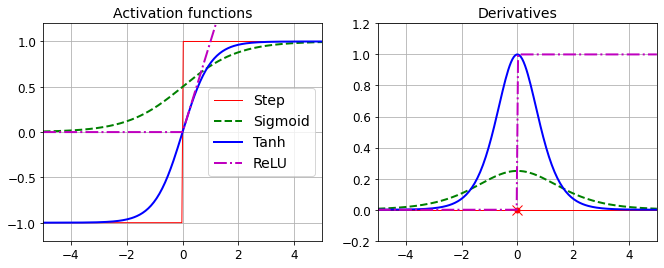

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## 10.1.5 회귀를 위한 다층 퍼셉트론
$$ \text{softplus} (z) = \log (1 + \text{exp} (z) ) $$.
$z$가 음수일 때 0에 가까워지고 양수일 때 $z$에 가깝게 된다.

훈련에 사용하는 손실 함수는 전형적으로 평균 제곱 오차이다. 

## 10.1.6 분류를 위한 다층 퍼셉트론
다중 레이블 이진 분류(mutilabel binary classification) 문제를 쉽게 처리할 수 있음. <br/>
ex) 스팸 메일인지 아닌지 예측하고 동시에 긴급한 메일인지 아닌지 예측하는 이메일 분류 시스템

확률 분폴르 예측해야 하므로 손실 함수에는 일반적으로 크로스 엔트로피 손실(cross-entropy loss)을 선택하는 것이 좋음.

# 10.2 케라스로 다층 퍼셉트론 구현하기
## 10.2.1 텐서플로 2 설치

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.0'

In [3]:
keras.__version__

'2.4.0'

## 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기
### 케라스를 사용하여 데이터셋 적재하기

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

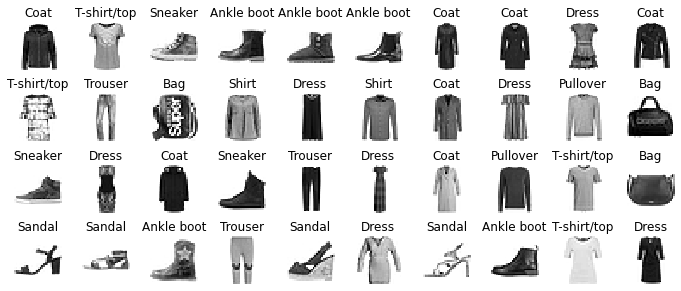

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 시퀀셜 API를 사용하여 모델 만들기

In [16]:
model = keras.models.Sequential() # 시퀀셜 모델 만들기
model.add(keras.layers.Flatten(input_shape=[28, 28])) # 첫 번째 층을 만들고 모델에 추가
model.add(keras.layers.Dense(300, activation="relu")) # Dense 은닉층 추가
model.add(keras.layers.Dense(100, activation="relu")) # 뉴런 100개를 가진 두 번째 Dense 은닉층 추가
model.add(keras.layers.Dense(10, activation="softmax")) # 클래스마다 하나씩 뉴런 10개를 가진 Dense 출력층 추가

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
model.get_layer(hidden1.name) is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

### 모델 컴파일

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics=["accuracy"])